# Theoretical Pre-investigation
For two non-overlapping subsets of the same population, projecting them along the principal components that maximise the amount of variation explained should yield approximately the same projection with similar eigenvectors and eigenvalues. In this Notebook we check that is the case, by measuring the angle between the vectors and comparing if the eigenvalies account for the same amount of variance to be explained.

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[0.90227394 0.09772606]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[0.90085772 0.09914228]


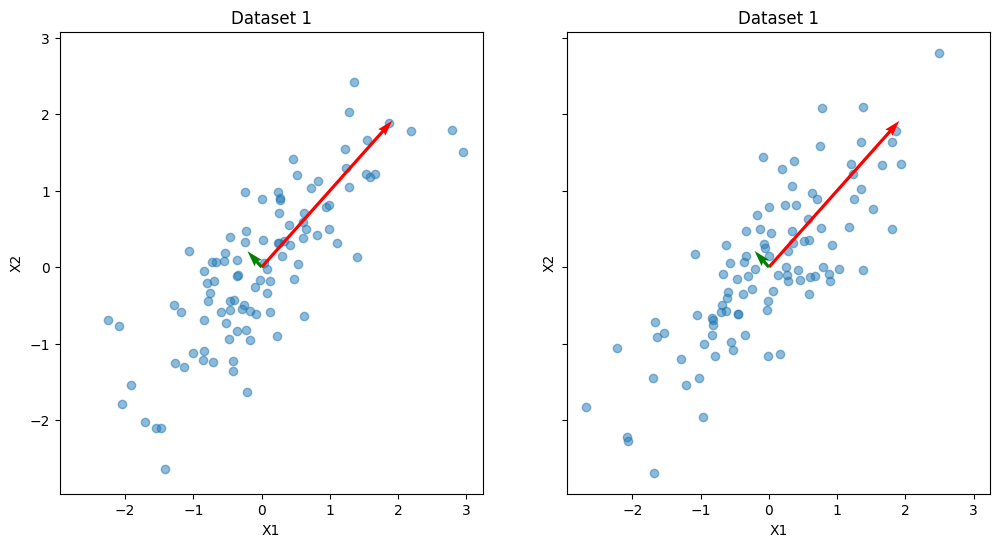

variation distance: 0.0028324571692465855
angle difference: 0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X1 = pd.DataFrame(np.random.multivariate_normal([0.5, 0.5], [[1, 0.8], [0.8, 1]], size=100), columns=['x1', 'x2'])
X2 = pd.DataFrame(np.random.multivariate_normal([0.5, 0.5], [[1, 0.8], [0.8, 1]], size=100), columns=['x1', 'x2'])

scaler1 = StandardScaler().fit(X1)
X1_scaled = scaler1.transform(X1)

scaler2 = StandardScaler().fit(X2)
X2_scaled = scaler2.transform(X2)

pca1 = PCA(n_components=2)
pca1_result = pca1.fit_transform(X1_scaled)

pca2 = PCA(n_components=2)
pca2_result = pca2.fit_transform(X2_scaled)

print(pca1.components_)
print(pca1.explained_variance_ratio_)

print(pca2.components_)
print(pca2.explained_variance_ratio_)

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
axs[0].scatter(X1_scaled[:, 0], X1_scaled[:, 1], alpha=0.5)
axs[0].quiver(0, 0, pca1.components_[0, 0], pca1.components_[0, 1], angles='xy', scale_units='xy', scale=1/(3*pca1.explained_variance_ratio_[0]), color='r')
axs[0].quiver(0, 0, pca1.components_[1, 0], pca1.components_[1, 1], angles='xy', scale_units='xy', scale=1/(3*pca1.explained_variance_ratio_[1]), color='g')
axs[0].set_title('Dataset 1')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')

axs[1].scatter(X2_scaled[:, 0], X2_scaled[:, 1], alpha=0.5)
axs[1].quiver(0, 0, pca2.components_[0, 0], pca2.components_[0, 1], angles='xy', scale_units='xy', scale=1/(3*pca2.explained_variance_ratio_[0]), color='r')
axs[1].quiver(0, 0, pca2.components_[1, 0], pca2.components_[1, 1], angles='xy', scale_units='xy', scale=1/(3*pca2.explained_variance_ratio_[1]), color='g')
axs[1].set_title('Dataset 1')
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')

# plt.savefig('pca_similar_samples.pdf')
plt.show()

var_difference = sum(abs(pca1.explained_variance_ratio_- pca2.explained_variance_ratio_))
print('variation distance:', var_difference)

len_r = np.sqrt(pca1.components_[0].dot(pca1.components_[0]))
len_f = np.sqrt(pca2.components_[0].dot(pca2.components_[0]))

angle_diff = min([np.arccos(pca1.components_[0] @ (s*pca2.components_[0])) for s in [1,-1]])/(len_r*len_f)
print('angle difference:', 2*angle_diff/np.pi)

In the next example we show how the metrics behave when the data is from two progressively more similar distributions.

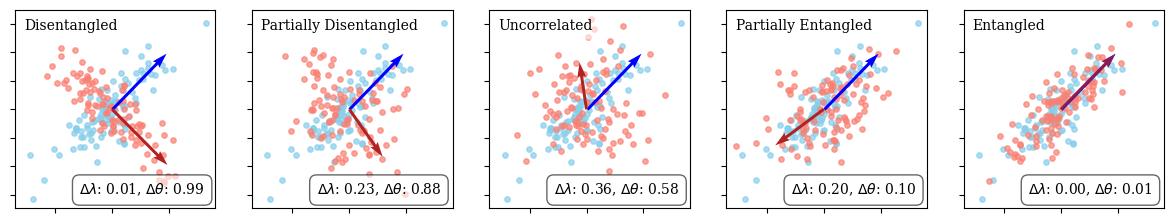

In [3]:
### FIGURE 1 in the paper ###

import numpy as np
import matplotlib.pyplot as plt

rcp = {'font.size': 10, 'font.family': 'serif'}
plt.rcParams.update(**rcp)

np.random.seed(27)

# Generate target data distribution
target_data = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], size=100)

# Calculate principal components for target data
target_pca = PCA().fit(target_data)
target_pc = target_pca.components_[0]

fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharex=True, sharey=True)

titles = ['Disentangled', 'Partially Disentangled', 'Uncorrelated',
        'Partially Entangled', 'Entangled']

for i, ax in enumerate(axs):

    # Generate source target distribution
    source_data = np.random.multivariate_normal([0, 0], [[1, -0.8+0.4*i], [-0.8+0.4*i, 1]], size=100)

    # Calculate principal components for source data
    source_pca = PCA().fit(source_data)
    source_pc = source_pca.components_[0]
    
    # Scatter plot of target and source data
    ax.scatter(target_data[:, 0], target_data[:, 1], alpha=0.7, label='Target Data',s=15, color='skyblue')
    ax.scatter(source_data[:, 0], source_data[:, 1], alpha=0.7, label='Source Data',s=15, color='salmon')
    ax.set_aspect('equal')

    # Quiver plot of principal components
    ax.quiver(0, 0, target_pc[0], target_pc[1], angles='xy', scale_units='xy', scale=1/(3*target_pca.explained_variance_ratio_[0]), label='Target PC',color='blue',ec='k',width=0.015)

    if i == 4:
        ax.quiver(0, 0, source_pc[0], source_pc[1], angles='xy', scale_units='xy', scale=1/(3*source_pca.explained_variance_ratio_[0]), label='Source PC',color='firebrick',alpha=0.8,width=0.015)
    else: ax.quiver(0, 0, source_pc[0], source_pc[1], angles='xy', scale_units='xy', scale=1/(3*source_pca.explained_variance_ratio_[0]), label='Source PC',color='firebrick',width=0.015)

    
    var_difference = 0.5*sum(abs(target_pca.explained_variance_ratio_- source_pca.explained_variance_ratio_))
    angle_diff = 2*min([np.arccos(target_pca.components_[0] @ (s*source_pca.components_[0])) for s in [1,-1]])/np.pi

    ax.text(-3.1, 2.8, titles[i], fontsize=10, bbox=dict(facecolor='white',alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5'))
    ax.text(-1.15, -3, rf"$\Delta\lambda$: {var_difference:.2f}, $\Delta\theta$: {angle_diff:.2f}", fontsize=10, bbox=dict(facecolor='white',alpha=0.6, edgecolor='black', boxstyle='round,pad=0.5'))
    ax.set_xticklabels([])
    ax.set_yticklabels([])


plt.tight_layout()
# plt.savefig('example_populations.pdf')

plt.show()

## Check variability due to sample size
We hypothesize that there is going to be a dependency in the number of samples that the two subsets have, to how reliably the empirical covariance matrix estimates the true covariance matrix. We will check this by comparing the metrics for different sample sizes, and with different numbers of variables.

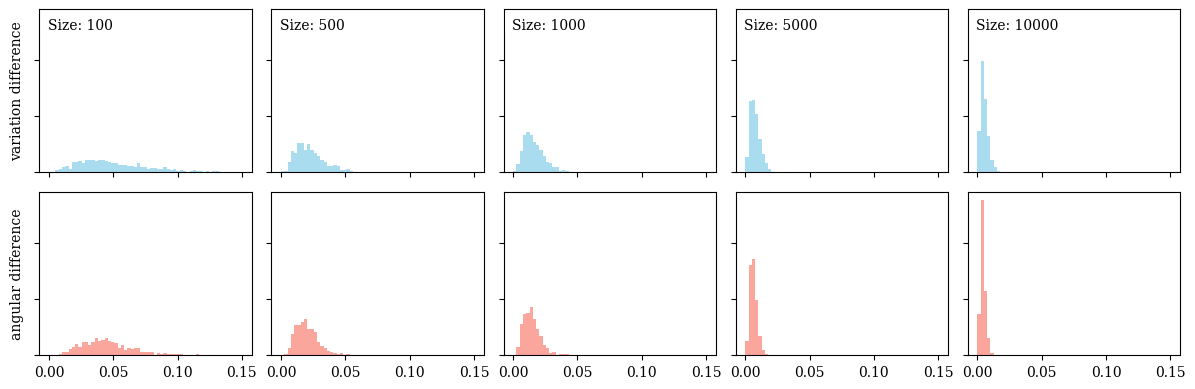

In [8]:
### Generate a series of small plots to illustrate variance in number of samples
from pcametric import PCAMetric

NUM_REPEATS = 1000
np.random.seed(43)

sizes = [100, 500, 1000, 5000, 10000]

mean = np.random.rand(5)

rcp = {'font.size': 10, 'font.family': 'serif'}
plt.rcParams.update(**rcp)

# Generating a random 5-dimensional covariance matrix
cov_matrix = np.random.rand(5, 5)
cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Making the matrix symmetric to ensure it's a valid covariance matrix
np.fill_diagonal(cov_matrix, 1)  # Ensuring diagonal values are 1 for variance

fig, axes = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=True)

for i, size in enumerate(sizes):
    vd_lst, ad_lst = [], []
    for _ in range(NUM_REPEATS):
        data1 = np.random.multivariate_normal(mean, cov_matrix, size=size)
        data2 = np.random.multivariate_normal(mean, cov_matrix, size=size)

        res = PCAMetric(data1, data2)[0]

        vd_lst.append(res['exp_var_diff'])
        ad_lst.append(res['comp_angle_diff'])
        
    # Plotting the metric comparison
    axes[0,i].hist(vd_lst, bins=np.linspace(0,0.15,60), color='skyblue', alpha=0.7)
    axes[0,i].text(0.04, 0.88, f'Size: {size}', fontsize=10, transform = axes[0,i].transAxes, bbox=dict(facecolor='white',alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5'))
    axes[1,i].hist(ad_lst, bins=np.linspace(0,0.15,60), color='salmon', alpha=0.7)
    
    if i > 0:
        axes[0,i].set_yticklabels([])

axes[0,0].set_ylabel('variation difference')
axes[1,0].set_ylabel('angular difference')

plt.tight_layout()
# plt.savefig('pca_sample_number.pdf')
plt.show()

We now show how our metric performs in comparison to others when we vary both number of samples AND number of variables.

We use SynthEval for accessing the other metrics. SynthEval is a Python package that provides a set of metrics to evaluate the quality of synthetic data. It is available on [GitHub](https://github.com/schneiderkamplab/syntheval) and can be installed via pip (`pip install syntheval`).

In [1]:
### Loading up metrics ###
from pcametric import PCAMetric

from syntheval.metrics.utility.metric_hellinger_distance import HellingerDistance
from syntheval.metrics.utility.metric_mixed_correlation import MixedCorrelation
from syntheval.metrics.utility.metric_kolmogorov_smirnov import KolmogorovSmirnovTest
from syntheval.metrics.utility.metric_propensity_mse import PropensityMeanSquaredError

def pca_metric(data1, data2):
    res, _, _ = PCAMetric(data1, data2, preprocess='mean')
    
    return {r'pca_$\Delta\lambda$': res['exp_var_diff'], r'pca_$\Delta\theta$' : res['comp_angle_diff']}

def hellinger(data1, data2):
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    HD = HellingerDistance(df1, df2, cat_cols=[], num_cols=np.arange(len(df1.columns)), verbose=False)
    res = HD.evaluate()

    return {'hellinger': res['avg']}

def corr(data1, data2):
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    corr = MixedCorrelation(df1, df2, cat_cols=[], num_cols=np.arange(len(df1.columns)), verbose=False)
    res = corr.evaluate()

    return {'corr': res['corr_mat_diff']/int(res['corr_mat_dims']*(res['corr_mat_dims']-1)/2)}

def ks_test(data1, data2):
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    KS = KolmogorovSmirnovTest(df1, df2, cat_cols=[], num_cols=np.arange(len(df1.columns)), verbose=False)
    res = KS.evaluate()

    return {'ks_test': res['avg stat']}

def p_mse(data1, data2):
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    pmse = PropensityMeanSquaredError(df1, df2, cat_cols=[], num_cols=np.arange(len(df1.columns)), verbose=False)
    res = pmse.evaluate()
    
    return {'pMSE': res['avg pMSE']/0.25}

In [3]:
### Preparing data for the experiment ###
import numpy as np
import pandas as pd

rcp = {'font.size': 10, 'font.family': 'serif'}
plt.rcParams.update(**rcp)

### Generate a series of small plots to illustrate variance in number of samples
np.random.seed(42)

NUM_REPEATS = 1000

metrics = [corr, p_mse, ks_test, pca_metric]
dims = [5**i for i in range(1,4)]
sizes = [10**i for i in range(1,5)]

res_dataframe = pd.DataFrame(columns=['metric', 'size', 'dims', 'result'])
for dim in dims:
    mean = np.random.rand(dim)

    cov_matrix = np.random.rand(dim, dim)
    cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Making the matrix symmetric to ensure it's a valid covariance matrix
    np.fill_diagonal(cov_matrix, 1)  # Ensuring diagonal values are 1 for variance

    # Generating data for each size
    for i, size in enumerate(sizes):
        for _ in range(NUM_REPEATS):
            # Generating two multivariate random datasets
            data1 = np.random.multivariate_normal(mean, cov_matrix, size=size)
            data2 = np.random.multivariate_normal(mean, cov_matrix, size=size)

            for metric in metrics:
                results = metric(data1, data2)

                for result_name, value in results.items():
                    res_dataframe.loc[len(res_dataframe)] = {'metric': result_name, 'size': size, 'dims': dim, 'result': value}

res_dataframe.to_csv('datasets/results/metrics_std_sample_size_dims.csv', index=False)

C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_7860\3754950217.py:28: RuntimeWarning: covariance is not positive-semidefinite.
  data1 = np.random.multivariate_normal(mean, cov_matrix, size=size)
C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_7860\3754950217.py:29: RuntimeWarning: covariance is not positive-semidefinite.
  data2 = np.random.multivariate_normal(mean, cov_matrix, size=size)
C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_7860\3754950217.py:28: RuntimeWarning: covariance is not positive-semidefinite.
  data1 = np.random.multivariate_normal(mean, cov_matrix, size=size)
C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_7860\3754950217.py:29: RuntimeWarning: covariance is not positive-semidefinite.
  data2 = np.random.multivariate_normal(mean, cov_matrix, size=size)
C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_7860\3754950217.py:28: RuntimeWarning: covariance is not positive-semidefinite.
  data1 = np.random.multivariate_normal(mean, cov_matrix, size=size)
C:\Users\lautru

KeyboardInterrupt: 

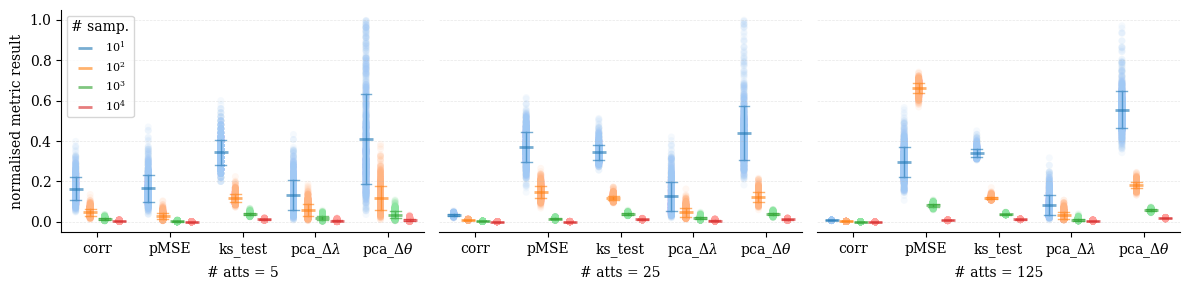

In [4]:
### FIGURE 2 in the paper ###
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rcp = {'font.size': 10, 'font.family': 'serif', "mathtext.fontset": "dejavuserif"}
plt.rcParams.update(**rcp)

### Plot part
fig, axes = plt.subplots(1,3,figsize=(12, 3), sharey=True, sharex=True)

res_dataframe = pd.read_csv('datasets/results/metrics_std_sample_size_dims.csv')

dims = res_dataframe['dims'].unique()

for i, ax in enumerate(axes.flat):
    dim = dims[i]

    sns.stripplot(
    data=res_dataframe[res_dataframe['dims'] == dim], x="metric", y="result", hue='size', zorder=1,
    dodge=.2, alpha=.1, legend=False, jitter=False, ax=ax, palette="pastel"
    )
    sns.pointplot(
        data=res_dataframe[res_dataframe['dims'] == dim], x="metric", y="result", hue='size',
        dodge=.6, linestyle=['none','none', 'none', 'none', 'none'], errorbar='sd', capsize=0.15,
        marker="_", markersize=10, markeredgewidth=2, ax=ax, palette="tab10",alpha=0.6,
        err_kws={'linewidth': 1}
    )
    legend_handles, _= ax.get_legend_handles_labels()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_legend().remove()

    ax.yaxis.grid(True, which='major', linestyle='--', linewidth='0.5',alpha=0.3)
    ax.set_xlabel('# atts = ' + str(dim))

axes[1].spines['left'].set_visible(False);axes[1].tick_params(axis='y', which='both', color='white')#axes[1].get_yaxis().set_ticks([])
axes[2].spines['left'].set_visible(False);axes[2].tick_params(axis='y', which='both', color='white')
axes[0].set_ylabel('normalised metric result')

axes[0].legend(legend_handles, [r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'], title='# samp.', title_fontsize=10, fontsize=8)

plt.tight_layout()
# plt.savefig('metrics_std_sample_size_dims.pdf')
plt.show()

## Check Ordinal Encoding?

In [ ]:
import pandas as pd

from pcametric import PCAMetric
from sklearn.preprocessing import OrdinalEncoder

# Load the dataset
df_train = pd.read_csv('data/breast_cancer_train.csv')

df_CART = pd.read_csv('data/breast_cancer_synthpop.csv')
df_GAN = pd.read_csv('data/breast_cancer_ctgan.csv')
df_nflow = pd.read_csv('data/breast_cancer_nflow.csv')

df_train = df_train.sample(frac=1).reset_index(drop=True)
# print(df_train.head())

OE = OrdinalEncoder()
df_train[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']] = OE.fit_transform(df_train[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']])

print(OE.categories_)

df_CART[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']] = OE.transform(df_CART[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']])
df_GAN[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']] = OE.transform(df_GAN[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']])
df_nflow[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']] = OE.transform(df_nflow[['Race','Marital Status','T Stage','N Stage','Sixth Stage','differentiate','A Stage','Estrogen Status','Progesterone Status','Status']])

print(pca_metric(df_train, df_CART))
print(pca_metric(df_train, df_GAN))
print(pca_metric(df_train, df_nflow))

# SE = SynthEval(df_train, cat_cols=[])
# SE.benchmark({'CART': df_CART, 'GAN': df_GAN, 'TVAE': df_TVAE}